In [1]:
using GridPotentialFlow
using Plots

In [2]:
Δx = 0.01
xlim = (-1,1)
ylim = (-1,1)
g = PhysicalGrid(xlim,ylim,Δx);

In [3]:
v1 = Vortex(0.5,0.0,1.0);
v2 = Vortex(-0.5,0.0,1.0);

In [4]:
d = sqrt((v1.x-v2.x)^2+(v1.y-v2.y)^2)
Vθ = v1.Γ/(2*π*d) # Analytical tangential velocity
T = π*d/abs(Vθ) # Analytical period

19.739208802178716

In [5]:
model = VortexModel(g,vortices=[v1,v2]);

In [6]:
ψ = computeψ(model);

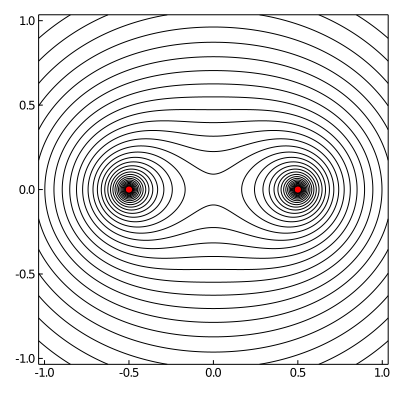

In [7]:
xg,yg = coordinates(ψ,g);
plot(xg,yg,ψ,linecolor=:black,levels=36,size=[400,400])
scatter!((v->v.x).(model.vortices.list),(v->v.y).(model.vortices.list),color=:red)

In [8]:
Δt = 0.01
T = 0:Δt:T

0.0:0.01:19.73

In [9]:
X_hist = []

0-element Array{Any,1}

In [10]:
for t in T
    
    Ẋ = computevortexvelocities(model)
    vortices = deepcopy(model.vortices.list)
    
    X = getvortexpositions(model)
    X = X + Ẋ*Δt
    setvortexpositions!(model,X)
    
    push!(X_hist,X)
    
end

In [11]:
ψ = computeψ(model);

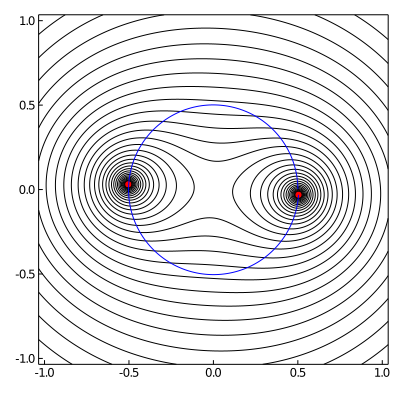

In [12]:
xg,yg = coordinates(ψ,g);
plot(xg,yg,ψ,linecolor=:black,levels=36,size=[400,400])
scatter!((v->v.x).(model.vortices.list),(v->v.y).(model.vortices.list),color=:red)
plot!((X->X[1]).(X_hist),(X->X[3]).(X_hist),color=:blue)

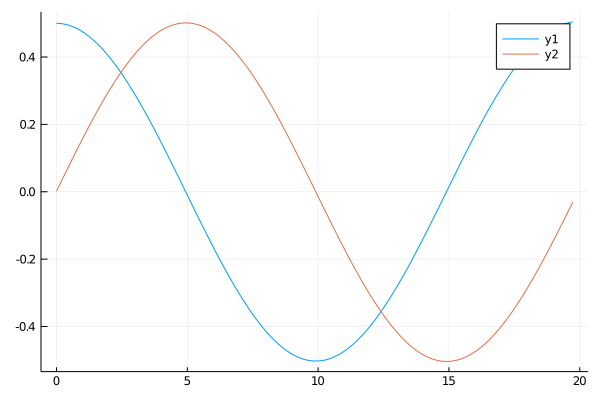

In [13]:
plot(T,(X->X[1]).(X_hist))
plot!(T,(X->X[3]).(X_hist))